In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from pylab import rcParams

In [3]:
df = pd.read_csv('data/samples/iris/iris.csv')
df

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Classifying dataframe according to type

In [4]:
dfavg = {
         'Avg_sepal_length': [(df[df['class']== 'Iris-setosa']).sepal_length_in_cm.mean(),(df[df['class']== 'Iris-virginica']).sepal_length_in_cm.mean(),(df[df['class']== 'Iris-versicolor']).sepal_length_in_cm.mean()],
         'Avg_sepal_width':  [(df[df['class']== 'Iris-setosa']).sepal_width_in_cm.mean(),(df[df['class']== 'Iris-virginica']).sepal_width_in_cm.mean(),(df[df['class']== 'Iris-versicolor']).sepal_width_in_cm.mean()],
         'Avg_petal_length': [(df[df['class']== 'Iris-setosa']).petal_length_in_cm.mean(),(df[df['class']== 'Iris-virginica']).petal_length_in_cm.mean(),(df[df['class']== 'Iris-versicolor']).petal_length_in_cm.mean()],
         'Avg_petal_width':  [(df[df['class']== 'Iris-setosa']).petal_width_in_cm.mean(),(df[df['class']== 'Iris-virginica']).petal_width_in_cm.mean(),(df[df['class']== 'Iris-versicolor']).petal_width_in_cm.mean()]
}
dfavg

{'Avg_sepal_length': [5.006, 6.587999999999998, 5.936],
 'Avg_sepal_width': [3.418, 2.974, 2.7700000000000005],
 'Avg_petal_length': [1.464, 5.5520000000000005, 4.26],
 'Avg_petal_width': [0.244, 2.0260000000000002, 1.3259999999999998]}

In [5]:
dfavg = pd.DataFrame (dfavg, columns = ['Avg_sepal_length','Avg_sepal_width','Avg_petal_length','Avg_petal_width'],index = ['Iris-setosa','Iris-virginica','Iris-versicolor'])
dfavg.head()

,Avg_sepal_length,Avg_sepal_width,Avg_petal_length,Avg_petal_width
Iris-setosa,5.006,3.418,1.464,0.244
Iris-virginica,6.588,2.974,5.552,2.026
Iris-versicolor,5.936,2.770,4.260,1.326


Visualizing the dataset to see distinctions

In [6]:
rcParams['figure.figsize'] = 9, 6

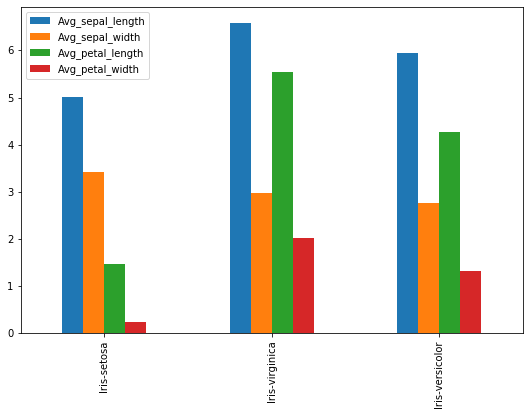

In [7]:
dfavg.plot(kind='bar')

We can see the characteristics vary distinctly for the three types of Iris.

 
So the dataset is good for trainning.

In [8]:
X = df[['sepal_length_in_cm','sepal_width_in_cm','petal_length_in_cm','petal_width_in_cm']]
#X.dropna(inplace = True)
y = df['class']
#y.dropna(inplace = True)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (120, 4) (120,)
Test set: (30, 4) (30,)


In [10]:
IrisTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
IrisTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [11]:
IrisTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [12]:
predTree = IrisTree.predict(X_test)
print (predTree [0:5])
print (y_test [0:5])

['Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica']
128    Iris-virginica
18        Iris-setosa
130    Iris-virginica
105    Iris-virginica
107    Iris-virginica
Name: class, dtype: object


In [13]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.9666666666666667


The accuracy of Decision Tree Model is > 95%

Now prediction can be made by providing data elements::::

In [14]:
predTree = IrisTree.predict([['1.1','2.2','22.','1.1']])
predTree

array(['Iris-virginica'], dtype=object)

-----------------------------------------------------------------

Applying K-Nearest Model also

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.93333333, 0.93333333, 0.96666667, 0.96666667, 0.96666667,
       0.96666667, 0.96666667, 0.96666667, 0.96666667])

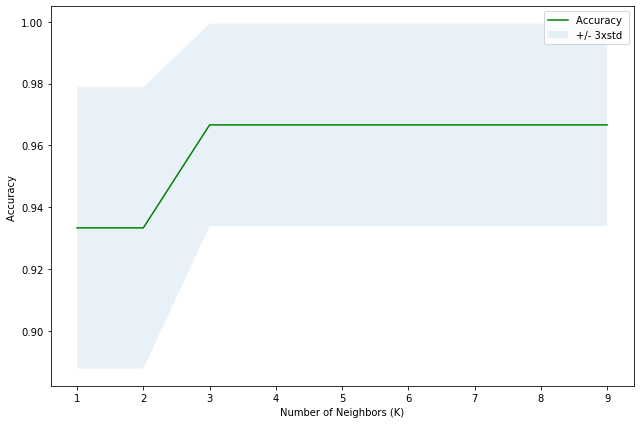

In [17]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

because there are 3 types of iris, the highest accuracy is at K = 3

In [18]:
k = 3          #K = 3 because there are 3 types of iris
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh
KNNyhat = neigh.predict(X_test)
print(KNNyhat[0:20])
print(y_test[0:20])

['Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica']
128     Iris-virginica
18         Iris-setosa
130     Iris-virginica
105     Iris-virginica
107     Iris-virginica
78     Iris-versicolor
83     Iris-versicolor
14         Iris-setosa
5          Iris-setosa
133     Iris-virginica
25         Iris-setosa
11         Iris-setosa
12         Iris-setosa
63     Iris-versicolor
113     Iris-virginica
34         Iris-setosa
60     Iris-versicolor
2          Iris-setosa
24         Iris-setosa
123     Iris-virginica
Name: class, dtype: object


In [19]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, KNNyhat))

Train set Accuracy:  0.975
Test set Accuracy:  0.9666666666666667


Now prediction can be made by providing data elements::::

In [20]:
predKNN = neigh.predict([['1.1','2.2','22.','1.1']])
predKNN

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:563: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:563: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


array(['Iris-virginica'], dtype=object)

----------------------------------------------------------------------------------